In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 927 kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import category_encoders as ce
import missingno as mn
import lightgbm as ltb
from sklearn.ensemble import ExtraTreesRegressor
random.seed(0)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Car details v3.csv")
data.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
print(data.shape)

(8128, 13)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
#check missing value
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
def encode(data):
  # #Encoding owner data
  data['owner'] = data['owner'].replace({'First Owner': 1, 
                                         'Second Owner': 2,
                                         'Third Owner': 3, 
                                         'Fourth & Above Owner': 4, 
                                         'Test Drive Car': 0})

  data['mi'] = data[data.mileage.notnull()].mileage.apply(lambda x: x.split(" ")[1])

  data['mileage']= data['mileage'].replace(' kmpl','', regex=True).str.replace(',', '')
  data['mileage']= data['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
  data['engine']= data['engine'].replace(' CC','',regex=True).str.replace(',', '')
  data['max_power']= data['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

  data['mileage'] = pd.to_numeric(data['mileage'])
  data['engine'] = pd.to_numeric(data['engine'])
  data['max_power'] = pd.to_numeric(data['max_power'])

  for i in range(data.shape[0]):
    if data['mi'].iloc[i] == 'km/kg':
      data.at[i, 'mileage'] = data.at[i, 'mileage'] * 1.4
      
  for i in range(data.shape[0]):
    data.at[i, 'Company'] = data['name'][i].split()[0]

In [8]:
encode(data)

In [9]:
import re

def torque_processing(torque):
    if type(torque) == int and torque == 0:
        return 0,0
#     -----------
    element = torque.split()
    power = []
    for e in element:
        tor = re.findall("(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", e)
        power.append(tor)
    power = [tor for tor in power if tor]
    if 'kgm@' in torque:
        # 1kgm@ = 10nm
        power[0] = round(float(power[0][0]) * 10, 1)
    else:
        power[0] = round(float(power[0][0]), 1)
    if len(power) == 2:
        if len(power[1]) == 2:
            power[1] = round(np.mean([float(i) for i in power[1]]), 1)
        else:
            power[1] = round(float(power[1][0]), 1)
    if len(power) == 1:
        power.append(None)
    if power[1] < 1000:
    # print('SMALLER THAN 1000',power[1])
        power[1] = round(power[1] * 1000, 1)
    return power[0], power[1]

In [10]:
data['torque'] = data['torque'].str.replace(',','.')
for i in range(data.shape[0]):
  try:
    torque, rpm = torque_processing(data['torque'].iloc[i])
    data.at[i, 'torque1'] = torque
    data.at[i, 'rpm'] = rpm
  except:
    pass

In [11]:
data.drop(5537,inplace=True)

In [12]:
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mi,Company,torque1,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,kmpl,Maruti,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,kmpl,Skoda,250.0,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,12.7@ 2.700(kgm@ rpm),5.0,kmpl,Honda,127.0,2700.0


In [13]:
data.drop(["name","torque",'mi'],axis=1, inplace = True)

In [15]:
# data['seats'].fillna(data['seats'].mode()[0], inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

In [16]:
data.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,torque1,rpm
count,8127.000000,8.127000e+03,8.127000e+03,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000
mean,2013.804971,6.383257e+05,6.980614e+04,1.458964,19.499928,1452.892703,91.053990,5.405439,178.828916,2920.325274
std,4.043571,8.062884e+05,5.654118e+04,0.717221,4.187703,498.227134,35.457274,0.948922,108.756181,4023.395098
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,624.000000,0.000000,2.000000,11.400000,1300.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1.000000,16.800000,1197.000000,68.100000,5.000000,111.800000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.160000,1248.000000,81.860000,5.000000,173.000000,2400.000000
75%,2017.000000,6.750000e+05,9.800000e+04,2.000000,22.320000,1582.000000,101.500000,5.000000,204.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,46.816000,3604.000000,400.000000,14.000000,1900.000000,251500.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8127 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8127 non-null   int64  
 1   selling_price  8127 non-null   int64  
 2   km_driven      8127 non-null   int64  
 3   fuel           8127 non-null   object 
 4   seller_type    8127 non-null   object 
 5   transmission   8127 non-null   object 
 6   owner          8127 non-null   int64  
 7   mileage        8127 non-null   float64
 8   engine         8127 non-null   float64
 9   max_power      8127 non-null   float64
 10  seats          8127 non-null   float64
 11  Company        8127 non-null   object 
 12  torque1        8127 non-null   float64
 13  rpm            8127 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 952.4+ KB


## **Visualization**

**Year**

In [18]:
data['year'].value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     123
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


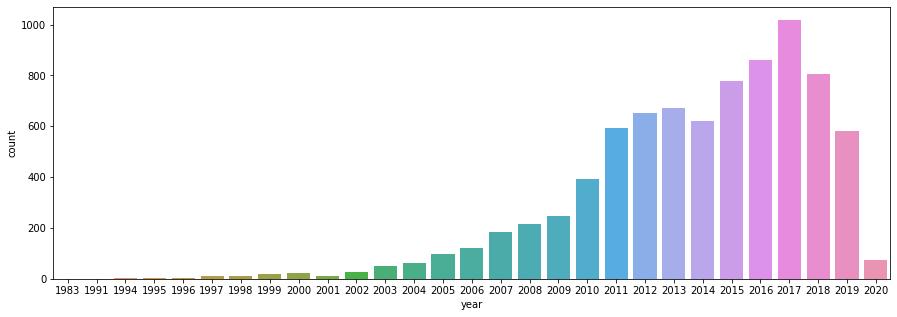

In [19]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(data['year'])

**Selling price vs Year**

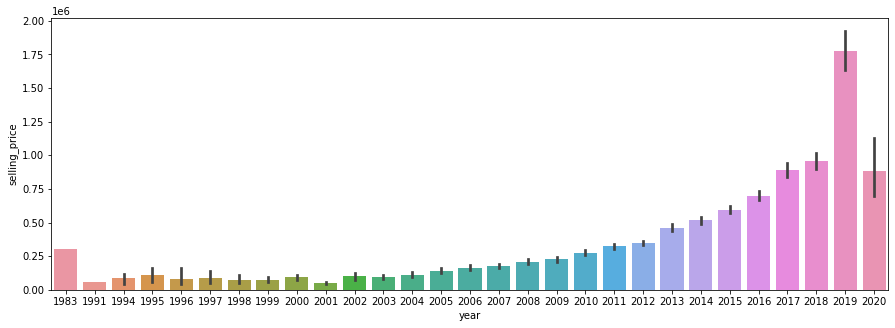

In [20]:
fig = plt.subplots(figsize = (15,5))
sns.barplot(x = 'year', y = 'selling_price', data = data)

**Selling price vs Fuel type**


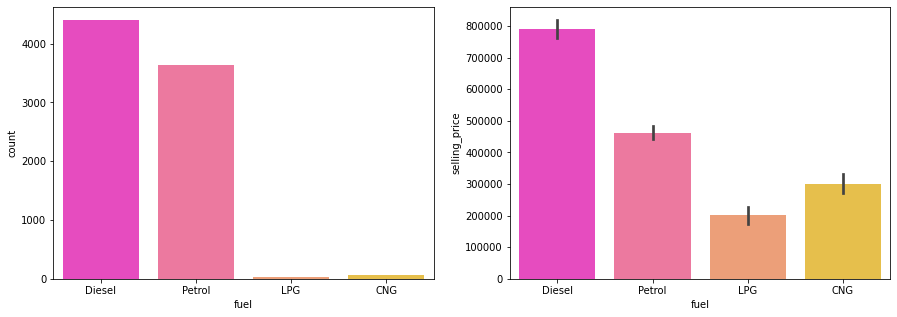

In [21]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'fuel', data = data, ax = axis1, palette='spring')
sns.barplot(x = 'fuel', y = 'selling_price', data = data, ax = axis2, palette='spring')

**Selling price vs Transmission type**

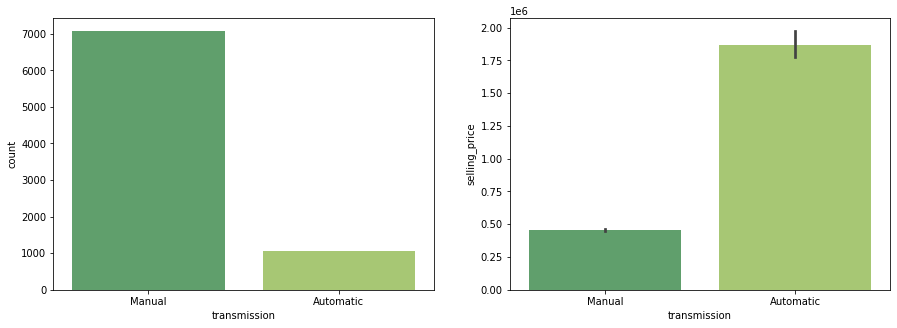

In [22]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'transmission', data = data, ax = axis1,palette='summer')
sns.barplot(x = 'transmission', y = 'selling_price', data = data, ax = axis2, palette='summer')

**Selling price vs Seller type**

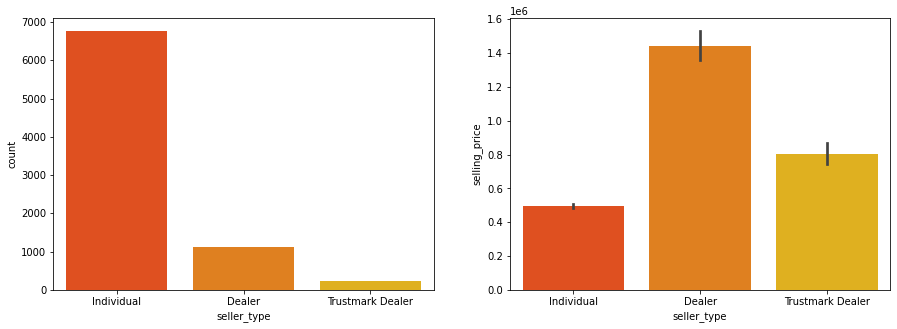

In [311]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'seller_type', data = data, ax = axis1, palette='autumn')
sns.barplot(x = 'seller_type', y = 'selling_price', data = data, 
            ax = axis2, palette='autumn')
     

**Owner**

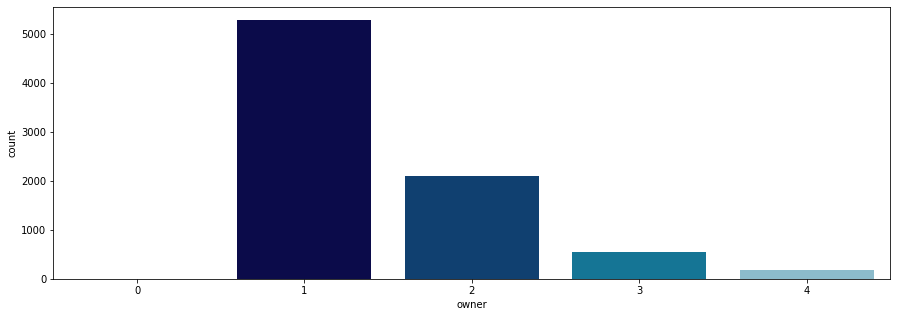

In [312]:
fig, axis1 = plt.subplots(figsize = (15,5))
sns.countplot(x = 'owner', data = data, ax = axis1, palette='ocean')

## **Data preparation**

In [23]:
encoder = ce.TargetEncoder()
data['Company'] = encoder.fit_transform(data['Company'], data['selling_price'])

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [24]:
ColumsToConvert = [column for column in data.columns if data[column].dtype == 'O']
ColumsToConvert

['fuel', 'seller_type', 'transmission']

In [25]:
def transform_col(df,Col):
    for i in Col:
        c = pd.get_dummies(df[i],prefix= i, drop_first =True)
        df = pd.concat ([df,c], axis = 1)
        df.drop(i , axis =1, inplace = True)

    return df 

train_data = transform_col(data,ColumsToConvert)

In [26]:
train_data.head(3)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,Company,torque1,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,403075.721405,190.0,2000.0,1,0,0,1,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,607723.771429,250.0,2000.0,1,0,0,1,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,597028.182403,127.0,2700.0,0,0,1,1,0,1


In [29]:
print(train_data.shape)


(8127, 17)


In [289]:
test = train_data[6095:]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 6096 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          2032 non-null   int64  
 1   selling_price                 2032 non-null   int64  
 2   km_driven                     2032 non-null   int64  
 3   owner                         2032 non-null   int64  
 4   mileage                       2032 non-null   float64
 5   engine                        2032 non-null   float64
 6   max_power                     2032 non-null   float64
 7   seats                         2032 non-null   float64
 8   Company                       2032 non-null   float64
 9   torque1                       2032 non-null   float64
 10  rpm                           2032 non-null   float64
 11  fuel_Diesel                   2032 non-null   uint8  
 12  fuel_LPG                      2032 non-null   uint8  
 13  

In [293]:
test.head(3)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,Company,torque1,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
6096,2014,680000,64000,2,20.77,1248.0,88.8,7.0,403075.721405,200.0,1750.0,1,0,0,1,0,1
6097,2014,500000,120000,1,20.45,1461.0,83.8,5.0,462618.381579,200.0,1900.0,1,0,0,1,0,1
6098,2014,520000,120000,1,20.45,1461.0,83.8,5.0,462618.381579,200.0,1900.0,1,0,0,1,0,1


## **Splitting data**

In [30]:
x_train = train_data.drop('selling_price' , axis =1)
y_train = train_data.iloc[:,1]
y_train = y_train.values
x_train = x_train.values

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)

In [296]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train,y_train, test_size= 0.25, random_state=0, shuffle = False)

In [297]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(6095, 16)
(6095,)
(2032, 16)
(2032,)


In [298]:
Ytrain

array([450000, 370000, 158000, ..., 610000, 615000, 684000])

In [299]:
Ytest

array([680000, 500000, 520000, ..., 382000, 290000, 290000])

## **Model**

In [300]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### **Linear Regression**

In [301]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(Xtrain, Ytrain)

LinearRegression()

In [302]:
pred_lr = linear_reg.predict(Xtest)

In [303]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, pred_lr)))
score0 = r2_score(Ytest, pred_lr)
print("The accuracy of our model is {}%".format(round(score0, 4) *100))

RMSE: 318938.4726780909
The accuracy of our model is 82.87%


### **Random Forest Regression**

In [307]:
from sklearn.ensemble import RandomForestRegressor 
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=42)

In [308]:
pred_rf = rf_reg.predict(Xtest)

In [309]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, pred_rf)))
score1 = r2_score(Ytest, pred_rf)
print("The accuracy of our model is {}%".format(round(score1, 4) *100))

RMSE: 149416.11715464215
The accuracy of our model is 96.24000000000001%


### **LightGBM**

In [304]:
model_lgbm = ltb.LGBMRegressor(num_leaves = 85, n_estimators= 120,
                              reg_lambda= 0.15, reg_alpha= 0.008,
                             learning_rate= 0.1)
model_lgbm = model_lgbm.fit(Xtrain, Ytrain)                       

In [305]:
pred_lgbm = model_lgbm.predict(Xtest)

In [306]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, pred_lgbm)))
score2 = r2_score(Ytest, pred_lgbm)
print("The accuracy of our model is {}%".format(round(score2, 4) *100))

RMSE: 132016.00507284838
The accuracy of our model is 97.07000000000001%


In [310]:
#Kết quả giá tiền thực tế và giá tiền dự đoán
act_pred = test.assign(prediction = pred_lgbm)
act_pred

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,Company,torque1,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,prediction
6096,2014,680000,64000,2,20.77,1248.0,88.80,7.0,403075.721405,200.0,1750.0,1,0,0,1,0,1,599712.742011
6097,2014,500000,120000,1,20.45,1461.0,83.80,5.0,462618.381579,200.0,1900.0,1,0,0,1,0,1,537533.284060
6098,2014,520000,120000,1,20.45,1461.0,83.80,5.0,462618.381579,200.0,1900.0,1,0,0,1,0,1,537533.284060
6099,2012,390000,140000,2,18.90,1248.0,74.00,5.0,959946.674180,200.0,2000.0,1,0,0,1,0,1,326381.090151
6100,2012,434999,135000,3,18.90,1248.0,74.00,5.0,959946.674180,200.0,2000.0,1,0,0,1,0,1,331504.839005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,18.50,1197.0,82.85,5.0,458554.366784,113.7,4000.0,0,0,1,1,0,1,340905.180840
8124,2007,135000,119000,4,16.80,1493.0,110.00,5.0,458554.366784,240.0,2300.0,1,0,0,1,0,1,173165.862212
8125,2009,382000,120000,1,19.30,1248.0,73.90,5.0,403075.721405,190.0,2000.0,1,0,0,1,0,1,242713.690229
8126,2013,290000,25000,1,23.57,1396.0,70.00,5.0,357433.107629,140.0,2400.0,1,0,0,1,0,1,298616.499186
